# Introduction to Artificial Intelligence
## Assignment 2
## Dominic Pelletier
## 10/26/2023

### Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.model_selection import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.neighbors import *

### Question 1

In [34]:
df = pd.read_csv("german-numeric.csv", sep=r"\s+", header=None)

y = df.pop(24) - 1
x = df

x_train, x_test, y_train, y_test = train_test_split(x.index, y, test_size=0.2)

model_knc = KNeighborsClassifier()
model_log = LogisticRegression()

model_knc.fit(x.iloc[x_train], y_train)
model_log.fit(x.iloc[x_train], y_train)

y_pred_knc = model_knc.predict(x.iloc[x_test])
y_pred_log = model_log.predict(x.iloc[x_test])

print(metrics.accuracy_score(y_test, y_pred_knc))
print(metrics.accuracy_score(y_test, y_pred_log))

print(metrics.classification_report(y_test, y_pred_knc))
print(metrics.classification_report(y_test, y_pred_log))

0.685
0.785
              precision    recall  f1-score   support

           0       0.76      0.82      0.78       141
           1       0.46      0.37      0.41        59

    accuracy                           0.69       200
   macro avg       0.61      0.59      0.60       200
weighted avg       0.67      0.69      0.67       200

              precision    recall  f1-score   support

           0       0.81      0.90      0.86       141
           1       0.68      0.51      0.58        59

    accuracy                           0.79       200
   macro avg       0.75      0.70      0.72       200
weighted avg       0.78      0.79      0.77       200



c:\Users\DJ\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Logistic Regression method appears to be consistently better.

### Question 2

In [43]:
p = y_pred_knc
t = y_test

confusionmatrix = np.array([[0, 0], [0, 0]])

for i,v in enumerate(y_test):
    confusionmatrix[p[i], v] += 1

print(confusionmatrix)

[[115  37]
 [ 26  22]]


In [49]:
acc = (confusionmatrix[0,0] + confusionmatrix[1,1]) / (confusionmatrix[0,0] + confusionmatrix[1,0] + confusionmatrix[0, 1] + confusionmatrix[1,1])
prec = confusionmatrix[1,1] / (confusionmatrix[1,1] + confusionmatrix[1,0])
rec = confusionmatrix[1,1] / (confusionmatrix[1,1] + confusionmatrix[0,1])
print(acc, prec, rec)

0.685 0.4583333333333333 0.3728813559322034


My implementation has all three values matching what is reported by `print(metrics.classification_report(y_test, y_pred_knc))` in Question 1.

In [54]:
probs = model_knc.predict_proba(x)

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_knc, y_test)

auc = metrics.roc_auc_score(y_pred_knc, y_test)
print(auc)

0.6074561403508771


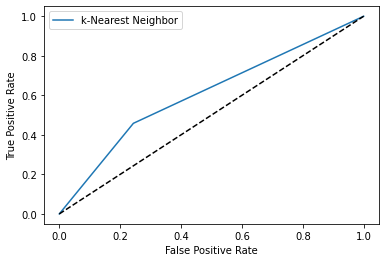

In [62]:
plt.plot(fpr, tpr, label='k-Nearest Neighbor')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

In [69]:
print(np.mean(cross_val_score(model_knc, x, y, cv=5)))

0.687


In [68]:
print(np.mean(cross_val_score(model_knc, x, y, cv=LeaveOneOut())))

0.687
